In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/train_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Date,Booking_Made,Marketing_Budget,Website_Visits,Ticket_Price,Tickets_Sold,Sales_Revenue,Operating_Expenses,Profit
0,0,2021-01-01,False,1217.741919,11789,1000.0,2389,2389000.0,1.695727e+06,693273.009394
1,1,2021-01-02,False,1462.814357,11778,1000.0,2381,2381000.0,1.691967e+06,689032.764060
2,2,2021-01-03,False,1498.712891,11804,1000.0,2369,2369000.0,1.686001e+06,682999.025547
3,3,2021-01-04,False,1243.245804,11809,1000.0,2371,2371000.0,1.686766e+06,684234.448174
4,4,2021-01-05,False,1307.334457,11444,1000.0,2334,2334000.0,1.668317e+06,665683.266002


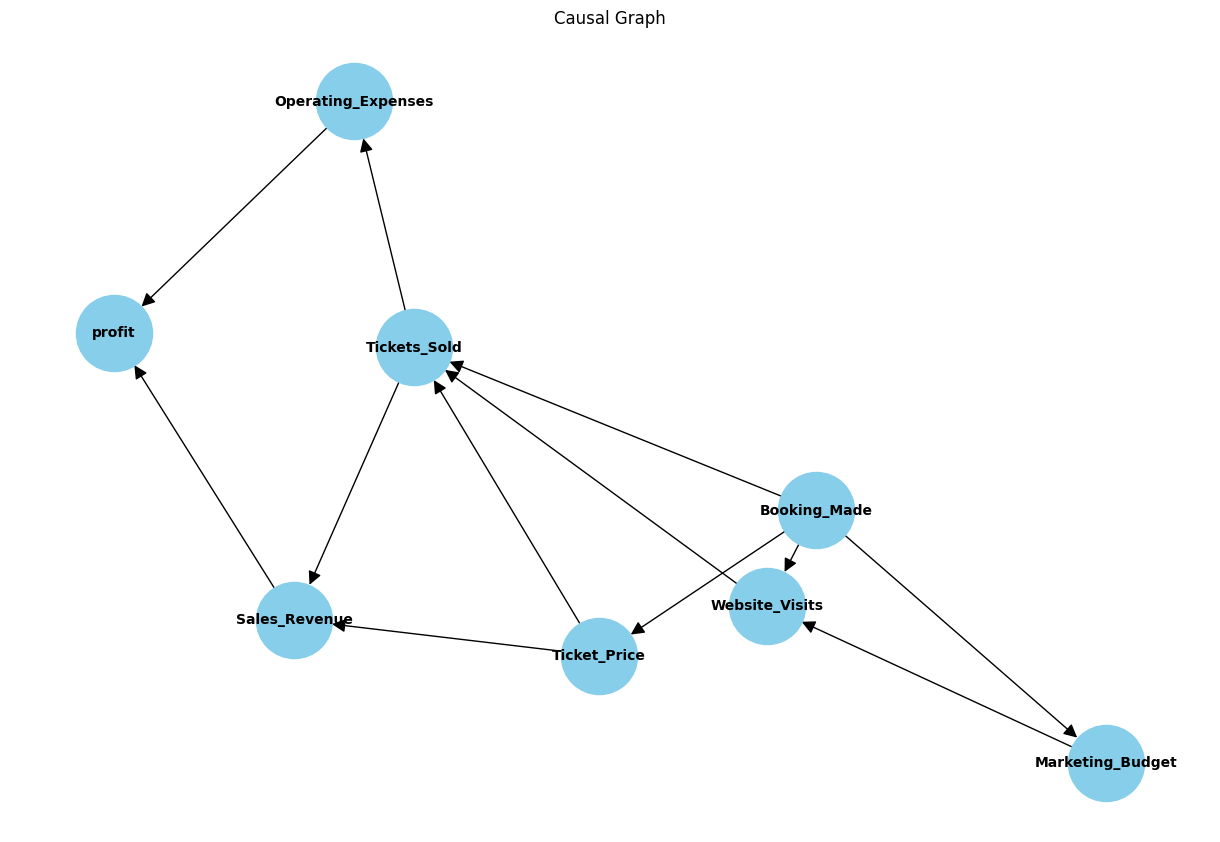

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define nodes and edges of the graph
causal_graph = nx.DiGraph()

# Add edges based on the provided descriptions
causal_graph.add_edges_from([
    ('Booking_Made', 'Marketing_Budget'),
    ('Booking_Made', 'Website_Visits'),
    ('Booking_Made', 'Tickets_Sold'),
    ('Booking_Made', 'Ticket_Price'),
    ('Marketing_Budget', 'Website_Visits'),
    ('Marketing_Budget', 'Website_Visits'),
    ('Website_Visits', 'Tickets_Sold'),
    ('Ticket_Price', 'Tickets_Sold'),
    ('Ticket_Price', 'Sales_Revenue'),
    ('Tickets_Sold', 'Sales_Revenue'),
    ('Tickets_Sold', 'Operating_Expenses'),
    ('Sales_Revenue', 'profit'),
    ('Operating_Expenses', 'profit')
])

# Drawing the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(causal_graph)
nx.draw(causal_graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Causal Graph')
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Convert the 'Booking_Made' column to numerical
data['Booking_Made'] = data['Booking_Made'].astype(int)

# Define a function to fit a linear regression model and return the parameters and noise variance
def fit_linear_model(X, y):
    X = sm.add_constant(X)  # Adding intercept
    model = sm.OLS(y, X).fit()
    params = model.params
    residuals = model.resid
    variance = np.var(residuals)
    return params, variance

# Define and fit structural causal models

# 1. Marketing_Budget ~ Booking_Made
params_mb, var_mb = fit_linear_model(data[['Booking_Made']], data['Marketing_Budget'])

# 2. Website_Visits ~ Booking_Made + Marketing_Budget
params_wv, var_wv = fit_linear_model(data[['Booking_Made', 'Marketing_Budget']], data['Website_Visits'])

# 3. Ticket_Price ~ Booking_Made
params_tp, var_tp = fit_linear_model(data[['Booking_Made']], data['Ticket_Price'])

# 4. Tickets_Sold ~ Booking_Made + Website_Visits + Ticket_Price
params_ts, var_ts = fit_linear_model(data[['Booking_Made', 'Website_Visits', 'Ticket_Price']], data['Tickets_Sold'])

# 5. Sales_Revenue ~ Tickets_Sold + Ticket_Price
params_sr, var_sr = fit_linear_model(data[['Tickets_Sold', 'Ticket_Price']], data['Sales_Revenue'])

# 6. Operating_Expenses ~ Marketing_Budget + Tickets_Sold
params_oe, var_oe = fit_linear_model(data[['Marketing_Budget', 'Tickets_Sold']], data['Operating_Expenses'])

# 7. Profit ~ Sales_Revenue + Operating_Expenses
params_profit, var_profit = fit_linear_model(data[['Sales_Revenue', 'Operating_Expenses']], data['Profit'])

# Display the parameters and noise variance for each model
models = {
    'Marketing_Budget': (params_mb, var_mb),
    'Website_Visits': (params_wv, var_wv),
    'Ticket_Price': (params_tp, var_tp),
    'Tickets_Sold': (params_ts, var_ts),
    'Sales_Revenue': (params_sr, var_sr),
    'Operating_Expenses': (params_oe, var_oe),
    'Profit': (params_profit, var_profit)
}

for key, value in models.items():
    params, variance = value
    print(f"{key}:")
    print("Parameters:", params)
    print("Variance of noise:", variance)
    print()


Marketing_Budget:
Parameters: const           1298.810581
Booking_Made    1368.006193
dtype: float64
Variance of noise: 14632.149321407916

Website_Visits:
Parameters: const               11090.272014
Booking_Made         7699.751795
Marketing_Budget        0.498163
dtype: float64
Variance of noise: 102774.96748172866

Ticket_Price:
Parameters: const           999.817506
Booking_Made    -92.024321
dtype: float64
Variance of noise: 116.09098220569678

Tickets_Sold:
Parameters: const             4206.538269
Booking_Made       764.685857
Website_Visits       0.270975
Ticket_Price        -5.023878
dtype: float64
Variance of noise: 10129.018058496422

Sales_Revenue:
Parameters: const          -6.121791e+06
Tickets_Sold    1.001806e+03
Ticket_Price    6.118322e+03
dtype: float64
Variance of noise: 140627890.18048668

Operating_Expenses:
Parameters: const               500011.095590
Marketing_Budget         0.997246
Tickets_Sold           500.000337
dtype: float64
Variance of noise: 36.990779